In [ ]:
"""
1) Apply Resampling method to your regression and classification tasks (40%).
    a) Cross Validation
    b) Bootstrap
2) Apply model selection method for your regression and classification tasks (40%).
    a) Subset Selection (Cp, AIC, BIC, and Adjusted R2)
    b) Shrinkage (Ridge and Lasso Regression)
    c) Dimension Reduction (PCA)
3) Write a report (20%).
"""

In [86]:
import pandas as pd
import numpy as np
from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression, 
    Ridge, 
    Lasso
)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.metrics import (
    confusion_matrix, 
    classification_report, 
    roc_curve, 
    auc, 
    roc_auc_score,
    mean_squared_error,
)
import statsmodels.api as sm
from tqdm import tqdm

In [54]:
df_reg = pd.read_csv('/Users/eljan/Documents/ML-Course-ADA/project-1/binaaz_cleaned.csv')
df_class = pd.read_csv("/Users/eljan/Documents/ML-Course-ADA/project-2/credit_score.csv")
df_class.drop(columns=["Unnamed: 0"], inplace=True)
df_class = df_class[df_class['Credit_Score'] != 1]
df_class['Credit_Score'] = df_class['Credit_Score'].map({2: 0, 0: 1})

In [55]:
df_reg.head()

,price,poster_type,Mərtəbə,Sahə,Otaq sayı,Kupça,İpoteka,distance_city_center,rayon_Abşeron,rayon_Binəqədi,...,metro_Nəsimi,metro_Qara Qarayev,metro_Sahil,metro_Ulduz,metro_Xalqlar Dostluğu,metro_İnşaatçılar,metro_İçəri Şəhər,metro_Şah İsmayıl Xətai,metro_Əhmədli,seher_baki
0,300000,0,0.294118,135.0,3,1,0,1.645502,0,0,...,0,0,0,0,0,0,0,0,0,1
1,89900,0,0.666667,65.0,2,1,0,4.888944,0,0,...,0,0,0,0,0,0,0,0,0,1
2,142000,0,0.647059,115.0,3,1,0,8.291625,0,0,...,0,0,0,0,0,0,0,0,0,1
3,235000,0,1.000000,192.0,4,1,0,6.159160,0,0,...,0,0,0,0,0,0,0,0,0,1
4,235000,0,0.750000,107.0,2,0,0,5.461605,0,0,...,0,0,0,0,0,0,0,0,0,1


In [56]:
df_class.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,2,23.000000,13,19114.12,4194.170850,3.0,4.0,3.0,4.0,128,...,1,809.98,31.944960,0,1,49.574949,118.280222,3,284.629162,0
1,6,34.429817,13,19114.12,4194.170850,3.0,4.0,3.0,4.0,128,...,1,809.98,28.609352,267,1,49.574949,81.699521,4,331.209863,0
2,0,23.000000,13,19114.12,4194.170850,3.0,4.0,3.0,4.0,128,...,1,809.98,31.377862,268,1,49.574949,199.458074,5,223.451310,0
3,7,23.000000,13,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,1,809.98,24.797347,269,1,49.574949,41.420153,1,341.489231,0
4,5,23.000000,13,19114.12,4194.170850,3.0,4.0,3.0,4.0,128,...,1,809.98,27.262259,270,1,49.574949,62.430172,6,340.479212,0


# Apply Resampling method

# Baseline

In [120]:
def print_evaluation(y_true, y_pred):
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    fpr, tpr, thresholds = roc_curve(y_true, y_pred, pos_label=1)
    print("AUC:", auc(fpr, tpr))

# Split data
df_class = df_class.sample(frac=1)
X = df_class.drop('Credit_Score', axis=1)
y = df_class['Credit_Score']
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print_evaluation(y_test, y_pred_log)

# LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)
print_evaluation(y_test, y_pred_lda)

# QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)
print_evaluation(y_test, y_pred_qda)

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print_evaluation(y_test, y_pred_nb)




[[2438  452]
 [ 680 3897]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      2890
           1       0.90      0.85      0.87      4577

    accuracy                           0.85      7467
   macro avg       0.84      0.85      0.84      7467
weighted avg       0.85      0.85      0.85      7467

AUC: 0.8475148421511802
[[2524  366]
 [ 798 3779]]
              precision    recall  f1-score   support

           0       0.76      0.87      0.81      2890
           1       0.91      0.83      0.87      4577

    accuracy                           0.84      7467
   macro avg       0.84      0.85      0.84      7467
weighted avg       0.85      0.84      0.85      7467

AUC: 0.8495031952299485
[[2522  368]
 [ 787 3790]]
              precision    recall  f1-score   support

           0       0.76      0.87      0.81      2890
           1       0.91      0.83      0.87      4577

    accuracy                           0.85      7467

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle



# Shuffle dataset to ensure random splitting
X, y = shuffle(X, y, random_state=1)

k = 5
fold_size = len(X) // k

def k_fold_cross_validation(X, y, k):
    errors = []

    for i in range(k):
        start, end = i * fold_size, (i + 1) * fold_size
        X_train = np.concatenate((X[:start], X[end:]))
        X_test = X[start:end]
        y_train = np.concatenate((y[:start], y[end:]))
        y_test = y[start:end]

        model = LinearRegression()
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        error = mean_squared_error(y_test, y_pred)
        errors.append(error)

    return errors

errors = k_fold_cross_validation(X, y, k)
average_error = np.mean(errors)

print(f"Mean Squared Errors for each fold: {errors}")
print(f"Average Mean Squared Error: {average_error}")


In [89]:
def cv_auc(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
    print(f"{model.__class__.__name__} - CV AUC:", scores.mean())

# Logistic Regression with Cross-Validation
cv_auc(log_reg, X, y)

# LDA with Cross-Validation
cv_auc(lda, X, y)

# QDA with Cross-Validation
cv_auc(qda, X, y)

# Naive Bayes with Cross-Validation
cv_auc(nb, X, y)

LogisticRegression - CV AUC: 0.9155710044422379
LinearDiscriminantAnalysis - CV AUC: 0.9070709553321361
QuadraticDiscriminantAnalysis - CV AUC: 0.8944473888571463
GaussianNB - CV AUC: 0.8876549373444561


In [122]:
def bootstrap_classification(model, X, y, n_bootstraps=300):
    auc_scores = []
    
    for _ in range(n_bootstraps):
        X_boot, y_boot = resample(X, y)
        model.fit(X_boot, y_boot)
        y_pred = model.predict(X)
        auc_scores.append(roc_auc_score(y, y_pred))
    
    print(f"{model.__class__.__name__} - Bootstrap AUC:", np.mean(auc_scores))

# Logistic Regression with Bootstrap
bootstrap_classification(log_reg, X, y)

# LDA with Bootstrap
bootstrap_classification(lda, X, y)

# QDA with Bootstrap
bootstrap_classification(qda, X, y)

# Naive Bayes with Bootstrap
bootstrap_classification(nb, X, y)

LogisticRegression - Bootstrap AUC: 0.8475394428453392
LinearDiscriminantAnalysis - Bootstrap AUC: 0.8490075585456008


KeyboardInterrupt: 

In [83]:
X = df_reg.drop('price', axis=1)
y = df_reg['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
rss_lin = np.sum((y_pred_lin - y_test)**2)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)
y_pred_poly = poly_reg.predict(X_poly_test)
rss_poly = np.sum((y_pred_poly - y_test)**2)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

print("Linear Regression - RSS:", rss_lin, "RMSE:", rmse_lin)
print("Polynomial Regression - RSS:", rss_poly, "RMSE:", rmse_poly)


Linear Regression - RSS: 7045528535081.69 RMSE: 36791.409156484144
Polynomial Regression - RSS: 7.91459220351031e+22 RMSE: 3899454924.7188563


In [84]:
# Linear Regression with Cross-Validation
lin_reg_cv_scores = cross_val_score(lin_reg, X, y, cv=10, scoring='neg_mean_squared_error')
print("Linear Regression - CV RMSE:", np.sqrt(-lin_reg_cv_scores.mean()))

# Polynomial Features Transformation
X_poly = poly.fit_transform(X)

# Polynomial Regression with Cross-Validation
poly_reg_cv_scores = cross_val_score(poly_reg, X_poly, y, cv=10, scoring='neg_mean_squared_error')
print("Polynomial Regression - CV RMSE:", np.sqrt(-poly_reg_cv_scores.mean()))

Linear Regression - CV RMSE: 36908.9668594989
Polynomial Regression - CV RMSE: 22995436493.26417


In [85]:
def bootstrap_regression(model, X, y, n_bootstraps=100):
    mse_scores = []
    
    for _ in range(n_bootstraps):
        X_boot, y_boot = resample(X, y)
        model.fit(X_boot, y_boot)
        y_pred = model.predict(X)
        mse_scores.append(mean_squared_error(y, y_pred))
    
    print(f"{model.__class__.__name__} - Bootstrap RMSE:", np.sqrt(np.mean(mse_scores)))

# Linear Regression with Bootstrap
bootstrap_regression(lin_reg, X, y)

# Polynomial Regression with Bootstrap
bootstrap_regression(poly_reg, X_poly, y)

LinearRegression - Bootstrap RMSE: 36835.38140214576
LinearRegression - Bootstrap RMSE: 13146444987.57256


# Apply model selection method

### AIC and BIC subset selection

In [29]:
def stepwise_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, criterion='AIC'):
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            while True:
                # backward step
                model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
                # use all coefs except intercept
                pvalues = model.pvalues.iloc[1:]
                worst_pval = pvalues.max()  # null if pvalues is empty
                if worst_pval > threshold_out:
                    changed=True
                    worst_feature = pvalues.idxmax()
                    included.remove(worst_feature)
                else:
                    break
        if not changed:
            break
    model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
    if criterion == 'AIC':
        criterion_value = model.aic
    elif criterion == 'BIC':
        criterion_value = model.bic
    print('Resulting features:', included)
    print(f'Model {criterion}: {criterion_value}')
    return included

# Data preparation
X = df_reg.drop('price', axis=1)
y = df_reg['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying stepwise selection using AIC
aic_selected_features = stepwise_selection(X_train, y_train, criterion='AIC')
bic_selected_features = stepwise_selection(X_train, y_train, criterion='AIC')


Resulting features: ['seher_baki', 'Sahə', 'distance_city_center', 'metro_Elmlər Akademiyası', 'Kupça', 'metro_İçəri Şəhər', 'metro_Şah İsmayıl Xətai', 'metro_Nizami', 'metro_28 May', 'Otaq sayı', 'rayon_Binəqədi', 'metro_Sahil', 'metro_İnşaatçılar', 'İpoteka', 'metro_Bakmil', 'rayon_Sabunçu', 'metro_Azadlıq Prospekti', 'Mərtəbə', 'rayon_Abşeron']
Model AIC: 497112.04402335285
Resulting features: ['seher_baki', 'Sahə', 'distance_city_center', 'metro_Elmlər Akademiyası', 'Kupça', 'metro_İçəri Şəhər', 'metro_Şah İsmayıl Xətai', 'metro_Nizami', 'metro_28 May', 'Otaq sayı', 'rayon_Binəqədi', 'metro_Sahil', 'metro_İnşaatçılar', 'İpoteka', 'metro_Bakmil', 'rayon_Sabunçu', 'metro_Azadlıq Prospekti', 'Mərtəbə', 'rayon_Abşeron']
Model AIC: 497112.04402335285


In [32]:
X.shape, len(aic_selected_features), len(bic_selected_features)

((26025, 43), 19, 19)

In [100]:
X = df_reg.drop('price', axis=1)
y = df_reg['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train model with aic_selected_features
lin_reg_aic = LinearRegression()
lin_reg_aic.fit(X_train[aic_selected_features], y_train)   
y_pred_aic = lin_reg_aic.predict(X_test[aic_selected_features])
rss_aic = np.sum((y_pred_aic - y_test)**2)
rmse_aic = np.sqrt(mean_squared_error(y_test, y_pred_aic))

# train model with bic_selected_features
lin_reg_bic = LinearRegression()
lin_reg_bic.fit(X_train[bic_selected_features], y_train)
y_pred_bic = lin_reg_bic.predict(X_test[bic_selected_features])
rss_bic = np.sum((y_pred_bic - y_test)**2)
rmse_bic = np.sqrt(mean_squared_error(y_test, y_pred_bic))

print("AIC - RSS:", rss_aic, "RMSE:", rmse_aic)
print("BIC - RSS:", rss_bic, "RMSE:", rmse_bic)


AIC - RSS: 7123644936693.715 RMSE: 36994.806958815476
BIC - RSS: 7123644936693.715 RMSE: 36994.806958815476


### Adjusted R2 

In [135]:


def forward_selection_by_adj_r_squared(X, y, max_features=5):
    initial_features = X.columns.tolist()
    best_features = []
    best_adj_r_squared = -np.inf  # Start with the worst case scenario
    
    while len(best_features) < max_features:
        current_best_adj_r_squared = -np.inf
        candidate_feature = None
        
        for new_column in list(set(initial_features) - set(best_features)):
            model = sm.OLS(y, sm.add_constant(X[best_features + [new_column]])).fit()
            adj_r_squared = model.rsquared_adj
            if adj_r_squared > current_best_adj_r_squared:
                current_best_adj_r_squared = adj_r_squared
                candidate_feature = new_column

        # Check if the new candidate feature improves the model based on Adjusted R-squared
        if current_best_adj_r_squared > best_adj_r_squared:
            best_features.append(candidate_feature)
            best_adj_r_squared = current_best_adj_r_squared
        else:
            break  # Stop if no improvement

    # Fit the final model with the selected features
    final_model = sm.OLS(y, sm.add_constant(X[best_features])).fit()
    return best_features, final_model

# Data preparation
X = df_reg.drop('price', axis=1)
y = df_reg['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X = df_class.drop('Credit_Score', axis=1)
# y = df_class['Credit_Score']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply forward selection focused on Adjusted R-squared
selected_features, selected_model = forward_selection_by_adj_r_squared(X_train, y_train, max_features=10)

print("Selected Features:", selected_features)
print(selected_model.summary())


Selected Features: ['Sahə', 'distance_city_center', 'metro_Elmlər Akademiyası', 'Kupça', 'metro_İçəri Şəhər', 'metro_Şah İsmayıl Xətai', 'metro_Nizami', 'metro_28 May', 'Otaq sayı', 'rayon_Binəqədi']
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     5881.
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:43:01   Log-Likelihood:            -2.4875e+05
No. Observations:               20820   AIC:                         4.975e+05
Df Residuals:                   20809   BIC:                         4.976e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
          

### Mallows' Cp

In [130]:


def forward_selection_cp(X, y, mse_full, max_features=5):
    initial_features = X.columns.tolist()
    best_features = []
    best_cp = np.inf
    
    while len(best_features) < max_features:
        current_best_cp = np.inf
        candidate_feature = None
        
        for new_column in list(set(initial_features) - set(best_features)):
            temp_features = best_features + [new_column]
            model = sm.OLS(y, sm.add_constant(X[temp_features])).fit()
            mse_model = mean_squared_error(y, model.predict(sm.add_constant(X[temp_features])))
            n = len(y)
            p = len(temp_features)
            cp = (mse_model / mse_full) * n - (n - 2 * p)
            
            if cp < current_best_cp:
                current_best_cp = cp
                candidate_feature = new_column

        # Check if the new candidate feature improves the Cp value
        if current_best_cp < best_cp:
            best_features.append(candidate_feature)
            best_cp = current_best_cp
        else:
            break  # Stop if no improvement in Cp

    # Fit the final model with the selected features
    final_model = sm.OLS(y, sm.add_constant(X[best_features])).fit()
    return best_features, final_model, best_cp

# Data preparation
X = df_reg.drop('price', axis=1)
y = df_reg['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X = df_class.drop('Credit_Score', axis=1)
# y = df_class['Credit_Score']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the full model to get the MSE of the full model
full_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
mse_full = mean_squared_error(y_train, full_model.predict(sm.add_constant(X_train)))

# Apply forward selection focused on Mallows' Cp
selected_features, selected_model, selected_cp = forward_selection_cp(X_train, y_train, mse_full, max_features=10)

print("Selected Features:", selected_features)
print("Mallows' Cp:", selected_cp)
print(selected_model.summary())


Selected Features: ['Interest_Rate', 'Delay_from_due_date', 'Outstanding_Debt', 'Num_Credit_Card', 'Payment_of_Min_Amount', 'Credit_Mix', 'Credit_History_Age', 'Payment_Behaviour', 'Num_of_Loan', 'Num_Bank_Accounts']
Mallows' Cp: 249.77927564927813
                            OLS Regression Results                            
Dep. Variable:           Credit_Score   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     2704.
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:41:26   Log-Likelihood:                -11145.
No. Observations:               29868   AIC:                         2.231e+04
Df Residuals:                   29857   BIC:                         2.240e+04
Df Model:                          10                                         
Covariance Type:            nonrobust   

In [136]:
selected_features

['Sahə',
 'distance_city_center',
 'metro_Elmlər Akademiyası',
 'Kupça',
 'metro_İçəri Şəhər',
 'metro_Şah İsmayıl Xətai',
 'metro_Nizami',
 'metro_28 May',
 'Otaq sayı',
 'rayon_Binəqədi']

In [138]:
# train logistic regression model with selected features
# scale data
scaler = StandardScaler()
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train[selected_features], y_train)
y_pred_log = log_reg.predict(X_test[selected_features])
print_evaluation(y_test, y_pred_log)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

         138       0.00      0.00      0.00         1
         150       0.00      0.00      0.00         1
         350       0.00      0.00      0.00         1
         390       0.00      0.00      0.00         1
         400       0.00      0.00      0.00         2
         800       0.00      0.00      0.00         1
        1000       0.00      0.00      0.00         1
        1500       0.00      0.00      0.00         1
       12000       0.00      0.00      0.00         1
       16000       0.00      0.00      0.00         1
       19000       0.00      0.00      0.00         1
       25000       0.00      0.00      0.00         1
       26500       0.00      0.00      0.00         1
       30000       0.00      0.00      0.00         1
       31000       0.00      0.00      0.00         1
       32000   

/Users/eljan/anaconda3/envs/polygraf/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/eljan/anaconda3/envs/polygraf/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/eljan/anaconda3/envs/polygraf/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetr

In [115]:
# trtain with selected_features
lin_reg_cp = LinearRegression()
lin_reg_cp.fit(X_train[selected_features], y_train)
y_pred_cp = lin_reg_cp.predict(X_test[selected_features])
rss_cp = np.sum((y_pred_cp - y_test)**2)
rmse_cp = np.sqrt(mean_squared_error(y_test, y_pred_cp))

print("Cp - RSS:", rss_cp, "RMSE:", rmse_cp)


Cp - RSS: 7323222440026.668 RMSE: 37509.45430620157


## Classification

## Regression with Ridge and Lasso Shrinkage

In [101]:
# Split data
X = df_reg.drop('price', axis=1)
y = df_reg['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression
ridge_reg = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)
rss_ridge = np.sum((y_pred_ridge - y_test)**2)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

# Lasso Regression
lasso_reg = Lasso(alpha=0.1)  # alpha can be tuned
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)
rss_lasso = np.sum((y_pred_lasso - y_test)**2)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print("Ridge Regression - RSS:", rss_ridge, "RMSE:", rmse_ridge)
print("Lasso Regression - RSS:", rss_lasso, "RMSE:", rmse_lasso)

Ridge Regression - RSS: 7039801204478.572 RMSE: 36776.45219456246
Lasso Regression - RSS: 7045031728183.132 RMSE: 36790.11198282189


/Users/eljan/anaconda3/envs/polygraf/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.737e+12, tolerance: 1.113e+10
  model = cd_fast.enet_coordinate_descent(


/Users/eljan/anaconda3/envs/polygraf/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.337e+11, tolerance: 1.113e+10
  model = cd_fast.enet_coordinate_descent(
/Users/eljan/anaconda3/envs/polygraf/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.997e+11, tolerance: 1.113e+10
  model = cd_fast.enet_coordinate_descent(
/Users/eljan/anaconda3/envs/polygraf/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

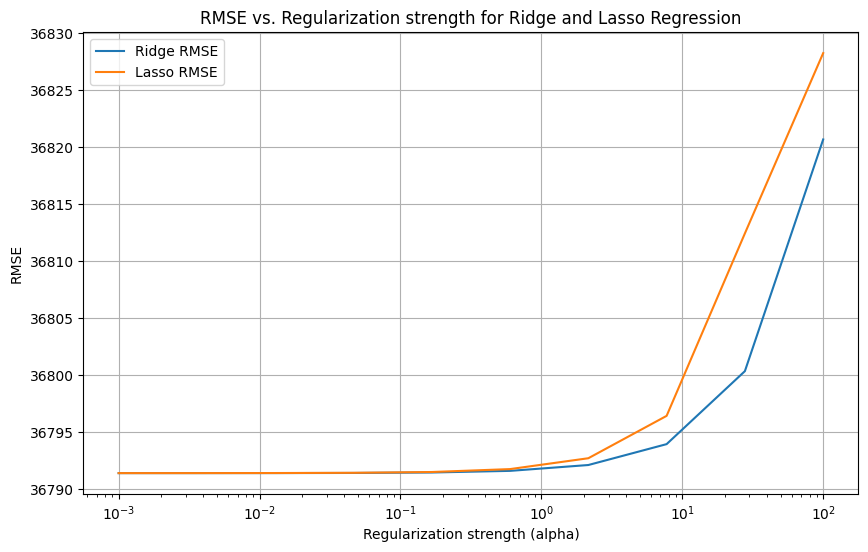

In [145]:
X = df_reg.drop('price', axis=1)
y = df_reg['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Different alpha values to test
alpha_values = np.logspace(-3, 2, 10)  # Logarithmically spaced alphas
ridge_rmse = []
lasso_rmse = []

for alpha in alpha_values:
    # Ridge Regression
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    y_pred_ridge = ridge_reg.predict(X_test)
    rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
    ridge_rmse.append(rmse_ridge)
    
    # Lasso Regression
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_train, y_train)
    y_pred_lasso = lasso_reg.predict(X_test)
    rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
    lasso_rmse.append(rmse_lasso)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.semilogx(alpha_values, ridge_rmse, label='Ridge RMSE')
plt.semilogx(alpha_values, lasso_rmse, label='Lasso RMSE')
plt.xlabel('Regularization strength (alpha)')
plt.ylabel('RMSE')
plt.title('RMSE vs. Regularization strength for Ridge and Lasso Regression')
plt.legend()
plt.grid(True)
plt.show()

## Regression with PCA:

In [102]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# PCA with Linear Regression
pca = PCA(n_components=0.95)  # retains 95% of variance
pca_reg = make_pipeline(pca, LinearRegression())
pca_reg.fit(X_train, y_train)
y_pred_pca_reg = pca_reg.predict(X_test)
rss_pca_reg = np.sum((y_pred_pca_reg - y_test)**2)
rmse_pca_reg = np.sqrt(mean_squared_error(y_test, y_pred_pca_reg))

print("PCA with Linear Regression - RSS:", rss_pca_reg, "RMSE:", rmse_pca_reg)


PCA with Linear Regression - RSS: 10758897384774.242 RMSE: 45464.61478824245


[[2394  496]
 [ 745 3832]]
              precision    recall  f1-score   support

           0       0.76      0.83      0.79      2890
           1       0.89      0.84      0.86      4577

    accuracy                           0.83      7467
   macro avg       0.82      0.83      0.83      7467
weighted avg       0.84      0.83      0.83      7467

AUC: 0.8328016644074896


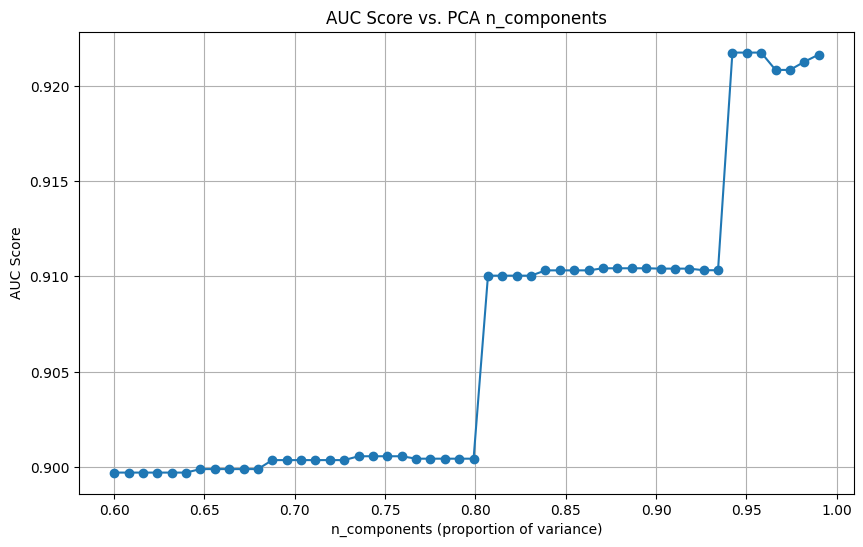

In [142]:
X = df_class.drop('Credit_Score', axis=1)
y = df_class['Credit_Score']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
pca = PCA(n_components=0.90)
pca.fit(X_train_scaled)

X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

log_reg_pca = LogisticRegression()
log_reg_pca.fit(X_train_pca, y_train)
y_pred_pca = log_reg_pca.predict(X_test_pca)
print_evaluation(y_test, y_pred_pca)


# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Different n_components to test
n_components_list = np.linspace(0.6, 0.99, 50)
auc_scores = []

for n in n_components_list:
    # Applying PCA
    pca = PCA(n_components=n)
    pca.fit(X_train_scaled)
    X_train_pca = pca.transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Logistic Regression
    log_reg_pca = LogisticRegression()
    log_reg_pca.fit(X_train_pca, y_train)
    y_pred_pca = log_reg_pca.predict_proba(X_test_pca)[:, 1]
    
    # Calculate AUC score
    auc_score = roc_auc_score(y_test, y_pred_pca)
    auc_scores.append(auc_score)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(n_components_list, auc_scores, marker='o')
plt.xlabel('n_components (proportion of variance)')
plt.ylabel('AUC Score')
plt.title('AUC Score vs. PCA n_components')
plt.grid(True)
plt.show()

In [111]:
# apply pca to regression
X = df_reg.drop('price', axis=1)
y = df_reg['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
pca = PCA(n_components=0.90)
pca.fit(X_train_scaled)

X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

lin_reg_pca = LinearRegression()
lin_reg_pca.fit(X_train_pca, y_train)
y_pred_pca = lin_reg_pca.predict(X_test_pca)
rss_pca = np.sum((y_pred_pca - y_test)**2)
rmse_pca = np.sqrt(mean_squared_error(y_test, y_pred_pca))

print("PCA with Linear Regression - RSS:", rss_pca, "RMSE:", rmse_pca)


PCA with Linear Regression - RSS: 7724121565483.585 RMSE: 38522.475108298386
